In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


In [219]:
sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e7/sample_submission.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")
train = pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")

In [220]:
train['Stage_fear'] = train['Stage_fear'].replace({'Yes': 1, 'No': 0})
train['Drained_after_socializing'] = train['Drained_after_socializing'].replace({'Yes': 1, 'No': 0})
test['Stage_fear'] = test['Stage_fear'].replace({'Yes': 1, 'No': 0})
test['Drained_after_socializing'] = test['Drained_after_socializing'].replace({'Yes': 1, 'No': 0})
train['Personality'] = train['Personality'].replace({'Extrovert': 1, 'Introvert': 0})
test

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,0.0,7.0,4.0,0.0,6.0,NaN
1,18525,NaN,1.0,0.0,0.0,1.0,5.0,1.0
2,18526,3.0,0.0,5.0,6.0,0.0,15.0,9.0
3,18527,3.0,0.0,4.0,4.0,0.0,5.0,6.0
4,18528,9.0,1.0,1.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,0.0,5.0,5.0,0.0,9.0,6.0
6171,24695,8.0,1.0,2.0,1.0,1.0,0.0,0.0
6172,24696,2.0,0.0,4.0,3.0,0.0,9.0,7.0
6173,24697,3.0,0.0,4.0,4.0,0.0,11.0,9.0


In [162]:
train.isna().mean(axis = 0)*100 #% what percent of the data is NaN , in each column

id                            0.000000
Time_spent_Alone              6.424098
Stage_fear                   10.219175
Social_event_attendance       6.370114
Going_outside                 7.914057
Drained_after_socializing     6.202764
Friends_circle_size           5.689916
Post_frequency                6.823580
Personality                   0.000000
dtype: float64

In [169]:
numeric_cols = train.select_dtypes(include=[np.number]).columns
missing_before = train[numeric_cols].isnull().sum().sum()
missing_before

9196

In [172]:
numeric_cols_test = test.select_dtypes(include=[np.number]).columns
missing_before_test = test[numeric_cols_test].isnull().sum().sum()
numeric_cols_test

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency'],
      dtype='object')

In [175]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputed_data = imputer.fit_transform(train[numeric_cols])
imputed_data_test = imputer.fit_transform(test[numeric_cols_test])

In [178]:
imputed_df = pd.DataFrame(imputed_data, columns=numeric_cols, index = train.index)
imputed_df[['Stage_fear','Drained_after_socializing']] = imputed_df[['Stage_fear','Drained_after_socializing']].round()
imputed_df[(imputed_df['Stage_fear'] == imputed_df['Personality'])]

imputed_df_test = pd.DataFrame(imputed_data_test, columns=numeric_cols_test, index = test['id'])
imputed_df_test[['Stage_fear','Drained_after_socializing']] = imputed_df_test[['Stage_fear','Drained_after_socializing']].round()
imputed_df_test.isna().mean()

id                           0.0
Time_spent_Alone             0.0
Stage_fear                   0.0
Social_event_attendance      0.0
Going_outside                0.0
Drained_after_socializing    0.0
Friends_circle_size          0.0
Post_frequency               0.0
dtype: float64

In [179]:
imputed_df.describe()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000,18524.000000
mean,9261.500000,3.113097,0.248488,5.256705,4.041892,0.250702,7.999449,4.974768,0.739527
std,5347.562529,2.948418,0.432148,2.709899,2.022236,0.433429,4.152106,2.828252,0.438905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,0.000000
50%,9261.500000,2.000000,0.000000,5.000000,4.000000,0.000000,8.000000,5.000000,1.000000
75%,13892.250000,4.000000,0.000000,7.200000,6.000000,1.000000,11.000000,7.000000,1.000000
max,18523.000000,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


In [180]:
imputed_df = imputed_df.drop(imputed_df[(imputed_df['Stage_fear'] == imputed_df['Personality']) & (imputed_df['Drained_after_socializing'] == imputed_df['Personality'])].index)
imputed_df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,1.0
1,1.0,1.0,0.0,7.0,3.0,0.0,10.0,8.0,1.0
2,2.0,6.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0
3,3.0,3.0,0.0,7.0,3.0,0.0,11.0,5.0,1.0
4,4.0,1.0,0.0,4.0,4.0,0.0,13.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...
18519,18519.0,3.0,0.0,7.0,3.0,0.0,9.0,7.0,1.0
18520,18520.0,1.0,0.0,6.0,7.0,0.0,6.0,5.0,1.0
18521,18521.0,7.0,1.0,1.0,1.0,1.0,1.0,6.0,0.0
18522,18522.0,3.0,1.0,1.0,0.0,1.0,5.0,2.0,0.0


In [181]:
imputed_df['Personality'].mean()*100

74.90259378826673

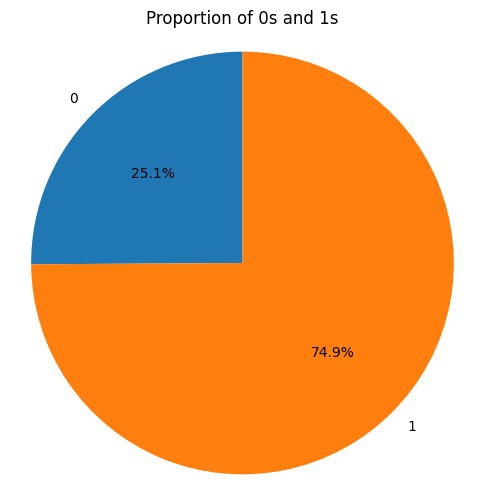

In [182]:
counts = imputed_df['Personality'].value_counts().sort_index()
labels = ['0', '1']
sizes = counts.values
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of 0s and 1s")
plt.axis('equal')
plt.show()

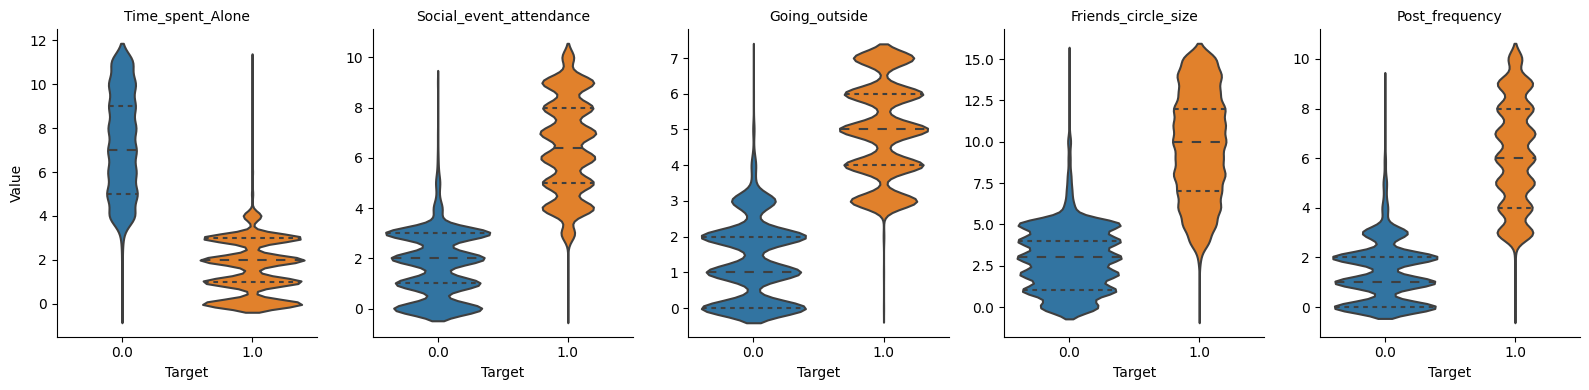

In [183]:
import seaborn as sns

# List your numeric features here:
features = ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']  

# Melt into long form:
df_melt = imputed_df.melt(
    id_vars='Personality', 
    value_vars=features,
    var_name='feature', 
    value_name='value'
)

# Draw a separate violin for each feature, split by target categories
g = sns.catplot(
    data=df_melt,
    x= 'Personality',              # categorical axis
    y='value',               # numeric axis
    col='feature',           # one subplot per feature
    kind='violin', 
    sharey=False,            # allow each plot its own y‑scale
    inner='quartile',        # show median & quartiles
    height=4, 
    aspect=0.8
)

# Tweak the layout
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Target", "Value")
plt.tight_layout()
plt.show()

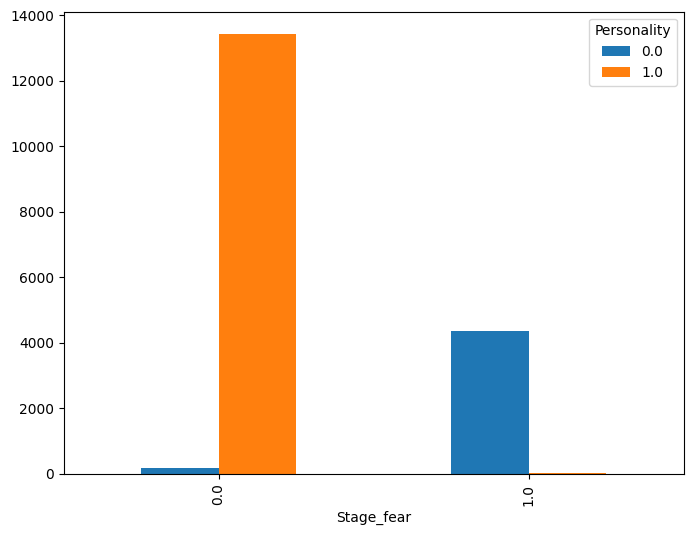

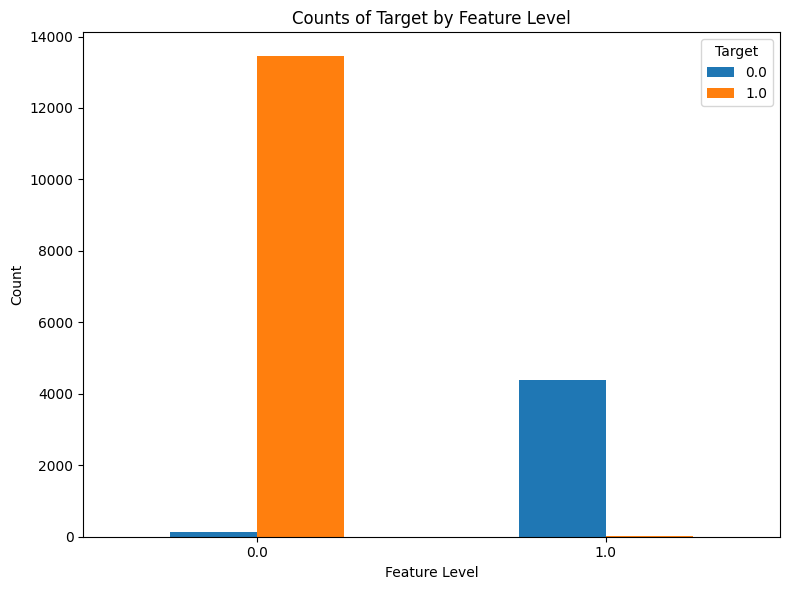

In [184]:
ct = pd.crosstab(imputed_df['Stage_fear'],imputed_df['Personality'])
ct1 = pd.crosstab(imputed_df['Drained_after_socializing'],imputed_df['Personality'])
# 2) Plot grouped bar chart
ct.plot(kind='bar', figsize=(8,6))
ct1.plot(kind='bar', figsize=(8,6))
plt.xlabel('Feature Level')
plt.ylabel('Count')
plt.title('Counts of Target by Feature Level')
plt.xticks(rotation=0)
plt.legend(title='Target')
plt.tight_layout()
plt.show()

In [188]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(imputed_df.drop("Personality",axis = 1), imputed_df['Personality'],test_size= 1e-3,stratify= imputed_df['Personality'],random_state=37)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17948, 8), (18, 8), (17948,), (18,))

In [189]:
neg, pos = np.bincount(imputed_df['Personality'])             # neg = count of 0s, pos = count of 1s
scale_pos_weight = neg / pos

In [190]:
model = XGBClassifier(
    objective='binary:logistic',      # standard logistic regression
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,          # newer XGBoost versions require disabling the legacy encoder
    eval_metric='aucpr',              # PR‑AUC is often better for imbalanced data than ROC‑AUC
    n_estimators=500,                 # you can tune this higher/lower
    learning_rate=0.05,               # smaller learning rate + more trees often helps
    max_depth=4,                      # shallower trees can generalize better
    min_child_weight=1,               # min sum of instance weight needed in a child
    gamma=0,                          # minimum loss reduction to make a further partition
    subsample=0.8,                    # row subsample ratio
    colsample_bytree=0.8,             # feature subsample ratio
    random_state=42
)

In [191]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [197]:
pred = model.predict(imputed_df_test)

In [202]:
(pred == imputed_df_test['Stage_fear']).mean()*100

0.8906882591093117

In [193]:
imputed_df_test

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
id,,,,,,,,
18524,18524.0,3.0,0.0,7.0,4.0,0.0,6.0,5.2
18525,18525.0,5.6,1.0,0.0,0.0,1.0,5.0,1.0
18526,18526.0,3.0,0.0,5.0,6.0,0.0,15.0,9.0
18527,18527.0,3.0,0.0,4.0,4.0,0.0,5.0,6.0
18528,18528.0,9.0,1.0,1.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
24694,24694.0,3.0,0.0,5.0,5.0,0.0,9.0,6.0
24695,24695.0,8.0,1.0,2.0,1.0,1.0,0.0,0.0
24696,24696.0,2.0,0.0,4.0,3.0,0.0,9.0,7.0


In [221]:
sub = pd.DataFrame()
sub['id'] = imputed_df_test['id'].values.astype(int)
sub['Personality'] = pred
sub['Personality'] = sub['Personality'].replace({1 : 'Extrovert', 0 : 'Introvert'})
sub.to_csv('/kaggle/working/submit.csv', index=False)

In [208]:
sample_submission

,id,Personality
0,18524,Extrovert
1,18525,Extrovert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Extrovert
...,...,...
6170,24694,Extrovert
6171,24695,Extrovert
6172,24696,Extrovert
6173,24697,Extrovert


In [214]:
imputed_df_test['id'].values

array([18524., 18525., 18526., ..., 24696., 24697., 24698.])

In [212]:
len(pred)

6175